# Decagon Training time with real database

## Python 3

50 epochs, SE=3, No protein features
* c-cb47@cmm.se:<br>
Total Time:$73588.72s\approx 20.44$h<br>
Virtual Memory:$104,711,553,024\approx104$Gb<br>
RSS Memory:$1,331,462,144\approx1.33$Gb<br>
+ nine@kth.se:<br>
Total Time:$73629.89s\approx 21.3$h<br>
Virtual Memory:$23,583,526,912\approx23$Gb<br>
RSS Memory:$835,149,824\approx835$Mb<br>


The accuracy values oscilate in both experiments, but in `nine` the oscilation has less amplitude (lower value of accuracy is $0.73$ not $0.68$)


# Time for calculation for Algoritmic Complexity (my computer)
Parallization of decomposition method

For a matrix of $16227\times 16227=238.05s\approx 4$ min in series.<br>
For a matrix of $16227\times 16227$ dividing it in $4$ pieces of $8113\times 8113=82.28s\approx 1.3$ min in parallel, jobs=4.<br>
For a matrix of $8113\times 8113=58.39s\approx 1$ min in series.<br>
For a matrix of $16226\times 16227$ dividing it in $16$ pieces of $\times 4056=89.67s\approx 1.3$ min in parallel, jobs=8.<br>

# Complexity of an adjacency matrix
The last values are always zero for matrices with dimensions non multiples of 4

In [1]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
import time
import os
import psutil
import shelve
import pickle
from pybdm import BDM
from pybdm.partitions import PartitionIgnore, PartitionCorrelated, PartitionRecursive
from pybdm.utils import decompose_dataset
from joblib import Parallel, delayed
from joblib import parallel_backend
from data.algorithms import PerturbationExperiment, NodePerturbationExperiment
import math
import datetime
from itertools import product
from matplotlib import pyplot as plt

In [2]:
N = 10
nodes_ignore = []
nodes_recursive = []
nodes_correlated = []
edges_ignore = []
edges_recursive = []
edges_correlated = []
reps = 100
for i in range(reps):
    b = np.random.randint(0,2,(N,N))
    X = ((b + b.T)/2).astype(int)
    # Partition Ignore
    bdm = BDM(ndim=2, partition=PartitionIgnore)
    node_perturbation = NodePerturbationExperiment(bdm, metric='bdm',bipartite_network=False)
    edge_perturbation = PerturbationExperiment(bdm,metric='bdm',bipartite_network=False)  
    node_perturbation.set_data(X)
    edge_perturbation.set_data(X)
    nodes_ignore.append(node_perturbation.run())
    edges_ignore.append(edge_perturbation.node_equivalent())
    # Partition Correlated
    bdm = BDM(ndim=2, partition=PartitionCorrelated)
    node_perturbation = NodePerturbationExperiment(bdm, metric='bdm',bipartite_network=False)
    edge_perturbation = PerturbationExperiment(bdm,metric='bdm',bipartite_network=False)  
    node_perturbation.set_data(X)
    edge_perturbation.set_data(X)
    nodes_correlated.append(node_perturbation.run())
    edges_correlated.append(edge_perturbation.node_equivalent())
    # Partition Recursive
    bdm = BDM(ndim=2, partition=PartitionRecursive)
    node_perturbation = NodePerturbationExperiment(bdm, metric='bdm',bipartite_network=False)
    edge_perturbation = PerturbationExperiment(bdm,metric='bdm',bipartite_network=False)  
    node_perturbation.set_data(X)
    edge_perturbation.set_data(X)
    nodes_recursive.append(node_perturbation.run())
    edges_recursive.append(edge_perturbation.node_equivalent())
n_avg_ignore = np.mean(nodes_ignore, axis=0)
n_std_ignore = np.std(nodes_ignore, axis=0)
n_avg_correlated = np.mean(nodes_correlated, axis=0)
n_std_correlated = np.std(nodes_correlated, axis=0)
n_avg_recursive = np.mean(nodes_recursive, axis=0)
n_std_recursive = np.std(nodes_recursive, axis=0)
e_avg_ignore = np.mean(edges_ignore, axis=0)
e_std_ignore = np.std(edges_ignore, axis=0)
e_avg_correlated = np.mean(edges_correlated, axis=0)
e_std_correlated = np.std(edges_correlated, axis=0)
e_avg_recursive = np.mean(edges_recursive, axis=0)
e_std_recursive = np.std(edges_recursive, axis=0)

In [3]:
KTH = (0.062, 0.313, 0.654)
KTH2 = (0.615, 0.062, 0.172)

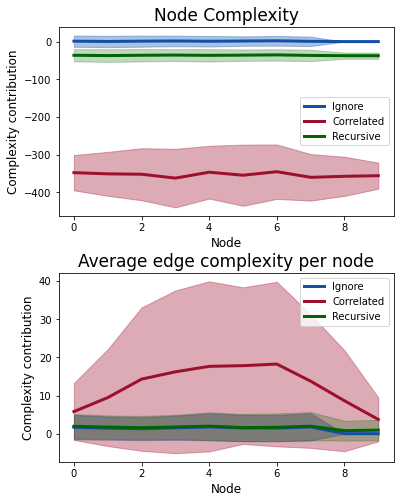

In [4]:
fig,ax = plt.subplots(2,1,figsize=(6,8))
x = np.arange(N)
ax[0].plot(x,n_avg_ignore,label='Ignore',color=KTH,linewidth=3)
ax[0].fill_between(x,n_avg_ignore-n_std_ignore,n_avg_ignore+n_std_ignore,color=KTH,\
                  alpha=0.35)
ax[0].plot(x,n_avg_correlated,label='Correlated',color=KTH2,linewidth=3)
ax[0].fill_between(x,n_avg_correlated-n_std_correlated,n_avg_correlated+n_std_correlated,\
                   color=KTH2,alpha=0.35)
ax[0].plot(x,n_avg_recursive,label='Recursive',color='darkgreen',linewidth=3)
ax[0].fill_between(x,n_avg_recursive-n_std_recursive,n_avg_recursive+n_std_recursive,\
                   color='darkgreen',alpha=0.25)
ax[0].set_xlabel('Node',fontsize=12)
ax[0].set_ylabel('Complexity contribution',fontsize=12)
ax[0].set_title('Node Complexity',color='k',fontsize=17)
ax[0].legend()
ax[1].plot(x,e_avg_ignore,label='Ignore',color=KTH,linewidth=3)
ax[1].fill_between(x,e_avg_ignore-e_std_ignore,e_avg_ignore+e_std_ignore,color=KTH,\
                  alpha=0.35)
ax[1].plot(x,e_avg_correlated,label='Correlated',color=KTH2,linewidth=3)
ax[1].fill_between(x,e_avg_correlated-e_std_correlated,e_avg_correlated+e_std_correlated,\
                   color=KTH2,alpha=0.35)
ax[1].plot(x,e_avg_recursive,label='Recursive',color='darkgreen',linewidth=3)
ax[1].fill_between(x,e_avg_recursive-e_std_recursive,e_avg_recursive+e_std_recursive,\
                   color='darkgreen',alpha=0.25)
ax[1].set_xlabel('Node',fontsize=12)
ax[1].set_ylabel('Complexity contribution',fontsize=12)
ax[1].set_title('Average edge complexity per node',color='k',fontsize=17)
ax[1].legend()
plt.subplots_adjust(hspace = 0.3)
#plt.show()
plt.savefig('partitions.pdf')

# Time experiments (DO NOT DELETE!)
In this experiment we see time of execution in series and in parallel of the `run()` function of the class NodePerturbationExperiment with different matrix sizes.<br>
Data taken 22/05/20

In [ ]:
N = np.array([10,50,100,200,400,500,700,800,900,1000])
S = np.array([0.030,0.114,0.813,6.7217,59.91,109.85,295.385,427.798,622.127,844.55])
P = np.array([1.20,4.129,7.370,22.910,52.55,68.289,122.082,166.802,225.77,300.792])

In [ ]:
figure(figsize=[12,8])
subplot(2,1,1)
plot(N,S,label='Series',linewidth=3)
plot(N,P,label='Parallel jobs=8',linewidth=3)
ylabel('Time(s)')
xlabel('Size of data matrix')
legend()
subplot(2,1,2)
loglog(N,S,label='Series',linewidth=3)
loglog(N,P,label='Parallel jobs=8',linewidth=3)
ylabel('Time(s)')
xlabel('Size of data matrix')
legend()
show()

## Size of matrices as function of number of koint side effects

In [ ]:
my_shelf = shelve.open('./data/data_structures/size')
data = my_shelf['data']
my_shelf.close()
N = [1,2,3,4,5,6,7,8,9,10,15,20,30,40,50]

In [ ]:
figure(figsize=(10,10))
errorbar(N, data[:,0], yerr=data[:,1], label='Number of genes')
errorbar(N, data[:,2], yerr=data[:,3], label='Number of drugs')
errorbar(N, data[:,4], yerr=data[:,5], label='Number of side effects')
legend()
show()

## Loading BDM data from CMM

In [ ]:
data_bdm = shelve.open("./data/data_structures/bdm_CMM")
for key in data_bdm:
    globals()[key]=data_bdm[key]
    print(key,"Imported successfully")
data_bdm.close()

In [ ]:
print('Total Time:',datetime.timedelta(seconds=total_time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')
print('16 cores')

In [ ]:
plot(bdm_ppi)